In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# EDA

In [2]:
# df_green_taxi=pd.read_csv('/kaggle/input/green-taxi-2015/2015_Green_Taxi_Trip_Data_20241019.csv')
df=pd.read_csv('/kaggle/input/green-taxi-2015/2015_Green_Taxi_Trip_Data_20241019.csv',nrows = 100000)
print(df.head())

   vendorid         pickup_datetime        dropoff_datetime  \
0         2  02/10/2015 08:46:15 AM  02/10/2015 08:59:50 AM   
1         2  01/09/2015 03:45:22 PM  01/09/2015 03:54:32 PM   
2         2  01/16/2015 10:07:38 PM  01/16/2015 10:14:25 PM   
3         2  02/11/2015 08:12:29 PM  02/11/2015 08:16:39 PM   
4         2  02/26/2015 10:42:27 AM  02/26/2015 10:57:30 AM   

  Store_and_fwd_flag  rate_code  Pickup_longitude  Pickup_latitude  \
0                  N          1        -73.828262        40.693958   
1                  N          1        -73.985672        40.669933   
2                  N          1        -73.892570        40.746658   
3                  N          1        -73.952034        40.714123   
4                  N          1        -73.894104        40.750774   

   Dropoff_longitude  Dropoff_latitude  Passenger_count  ...  Fare_amount  \
0         -73.776329         40.645348                1  ...         19.0   
1         -73.998367         40.679829        

In [3]:
df.describe()


,vendorid,rate_code,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Improvement_surcharge,Total_amount,Payment_type,Trip_type
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,0.0,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.782150,1.100190,-73.852625,40.706511,-73.823742,40.689206,1.376760,2.783076,12.116793,0.351972,0.486220,1.182468,0.104468,NaN,0.288300,14.529593,1.559300,1.023580
std,0.412787,0.615626,2.462257,1.358217,2.852207,1.572908,1.058378,3.011791,13.435245,0.369801,0.085937,6.858338,0.896099,NaN,0.058094,17.732994,0.522213,0.151737
min,1.000000,1.000000,-74.200844,0.000000,-74.257263,0.000000,0.000000,0.000000,-116.000000,-1.000000,-0.500000,-1.060000,-9.750000,NaN,-0.300000,-116.000000,1.000000,1.000000
25%,2.000000,1.000000,-73.958710,40.700493,-73.966331,40.702843,1.000000,1.010000,6.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,7.800000,1.000000,1.000000
50%,2.000000,1.000000,-73.944645,40.747284,-73.944000,40.749577,1.000000,1.830000,9.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,11.160000,2.000000,1.000000
75%,2.000000,1.000000,-73.916512,40.804646,-73.909744,40.796899,1.000000,3.550000,15.000000,0.500000,0.500000,1.880000,0.000000,NaN,0.300000,17.680000,2.000000,1.000000
max,2.000000,6.000000,0.000000,42.632847,0.000000,42.616947,8.000000,326.200000,2084.000000,1.000000,0.500000,1766.050000,105.990000,NaN,0.300000,3532.100000,5.000000,2.000000


In [4]:
null_values = df.isnull().sum()
print(null_values)

vendorid                      0
pickup_datetime               0
dropoff_datetime              0
Store_and_fwd_flag            0
rate_code                     0
Pickup_longitude              0
Pickup_latitude               0
Dropoff_longitude             0
Dropoff_latitude              0
Passenger_count               0
Trip_distance                 0
Fare_amount                   0
Extra                         0
MTA_tax                       0
Tip_amount                    0
Tolls_amount                  0
Ehail_fee                100000
Improvement_surcharge         0
Total_amount                  0
Payment_type                  0
Trip_type                     0
dtype: int64


In [5]:
df=df.drop(columns=['vendorid','Store_and_fwd_flag','Payment_type','Total_amount','MTA_tax','Tip_amount','Tolls_amount','Ehail_fee'])

In [6]:
print(df['pickup_datetime'].dtype)

df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

print(df['pickup_datetime'].dtype)
print(df['dropoff_datetime'].dtype)

df['pickup_datetime_year']=df['pickup_datetime'].dt.year
df['pickup_datetime_month']=df['pickup_datetime'].dt.month
df['pickup_datetime_day']=df['pickup_datetime'].dt.day
df['pickup_datetime_hour'] = df['pickup_datetime'].dt.hour
df['pickup_datetime_minute'] = df['pickup_datetime'].dt.minute
df['pickup_datetime_second'] = df['pickup_datetime'].dt.second
df['pickup_datetime_weekday'] = df['pickup_datetime'].dt.weekday

df['dropoff_datetime_year'] = df['dropoff_datetime'].dt.year
df['dropoff_datetime_month'] = df['dropoff_datetime'].dt.month
df['dropoff_datetime_day'] = df['dropoff_datetime'].dt.day
df['dropoff_datetime_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_datetime_minute'] = df['dropoff_datetime'].dt.minute
df['dropoff_datetime_second'] = df['dropoff_datetime'].dt.second
df['dropoff_datetime_weekday'] = df['dropoff_datetime'].dt.weekday


# df.describe()
df=df.drop(columns=['dropoff_datetime','pickup_datetime','dropoff_datetime_year','dropoff_datetime_month','pickup_datetime_year','pickup_datetime_month'])
print(df.head())

object
datetime64[ns]
datetime64[ns]
   rate_code  Pickup_longitude  Pickup_latitude  Dropoff_longitude  \
0          1        -73.828262        40.693958         -73.776329   
1          1        -73.985672        40.669933         -73.998367   
2          1        -73.892570        40.746658         -73.909294   
3          1        -73.952034        40.714123         -73.957848   
4          1        -73.894104        40.750774         -73.912811   

   Dropoff_latitude  Passenger_count  Trip_distance  Fare_amount  Extra  \
0         40.645348                1           5.95         19.0    0.0   
1         40.679829                3           1.15          7.5    0.0   
2         40.736202                1           1.74          7.5    0.5   
3         40.710945                1           0.50          5.0    0.5   
4         40.755722                2           1.80         11.0    0.0   

   Improvement_surcharge  ...  pickup_datetime_day  pickup_datetime_hour  \
0              

In [7]:
# Remove rows where Fare_amount is less than or equal to 0
df_cleaned = df[df['Fare_amount'] > 0].copy()
print(df.dtypes)

rate_code                     int64
Pickup_longitude            float64
Pickup_latitude             float64
Dropoff_longitude           float64
Dropoff_latitude            float64
Passenger_count               int64
Trip_distance               float64
Fare_amount                 float64
Extra                       float64
Improvement_surcharge       float64
Trip_type                     int64
pickup_datetime_day           int32
pickup_datetime_hour          int32
pickup_datetime_minute        int32
pickup_datetime_second        int32
pickup_datetime_weekday       int32
dropoff_datetime_day          int32
dropoff_datetime_hour         int32
dropoff_datetime_minute       int32
dropoff_datetime_second       int32
dropoff_datetime_weekday      int32
dtype: object


12.116793199999998


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


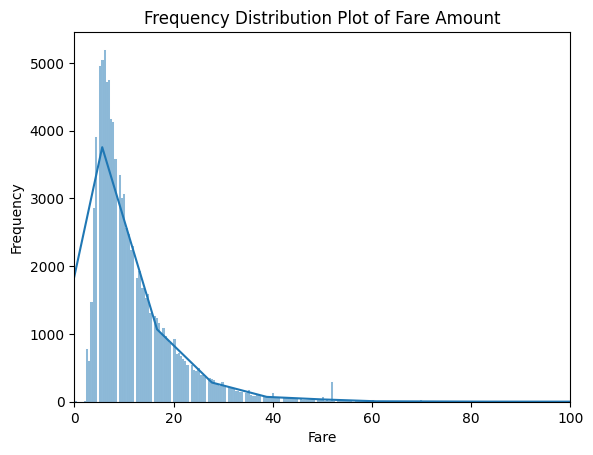

In [8]:
print(np.mean(df['Fare_amount']))
sns.histplot(df['Fare_amount'], bins=5000, kde=True)
plt.title('Frequency Distribution Plot of Fare Amount')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.xlim(0,100)

plt.show()


0-20 ke beech mein saare passenger jaa rahe hai

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


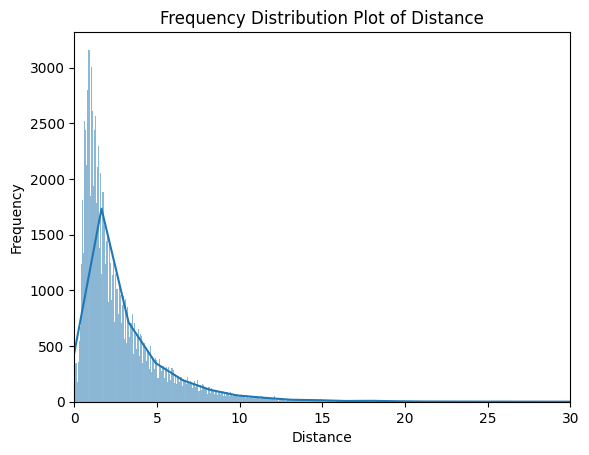

In [9]:
sns.histplot(df['Trip_distance'], bins=5000, kde=True)
plt.title('Frequency Distribution Plot of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')

plt.xlim(0,30)

plt.show()

0-5 ke beech mein saare

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

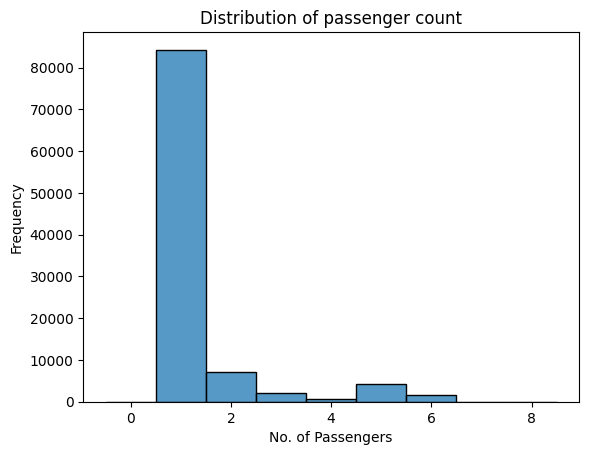

In [10]:
sns.histplot(data=df, x="Passenger_count", stat="count", discrete=True)
plt.title("Distribution of passenger count")
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

1 passenger akela ghoom raha hai

In [11]:
print(df.dtypes)

rate_code                     int64
Pickup_longitude            float64
Pickup_latitude             float64
Dropoff_longitude           float64
Dropoff_latitude            float64
Passenger_count               int64
Trip_distance               float64
Fare_amount                 float64
Extra                       float64
Improvement_surcharge       float64
Trip_type                     int64
pickup_datetime_day           int32
pickup_datetime_hour          int32
pickup_datetime_minute        int32
pickup_datetime_second        int32
pickup_datetime_weekday       int32
dropoff_datetime_day          int32
dropoff_datetime_hour         int32
dropoff_datetime_minute       int32
dropoff_datetime_second       int32
dropoff_datetime_weekday      int32
dtype: object


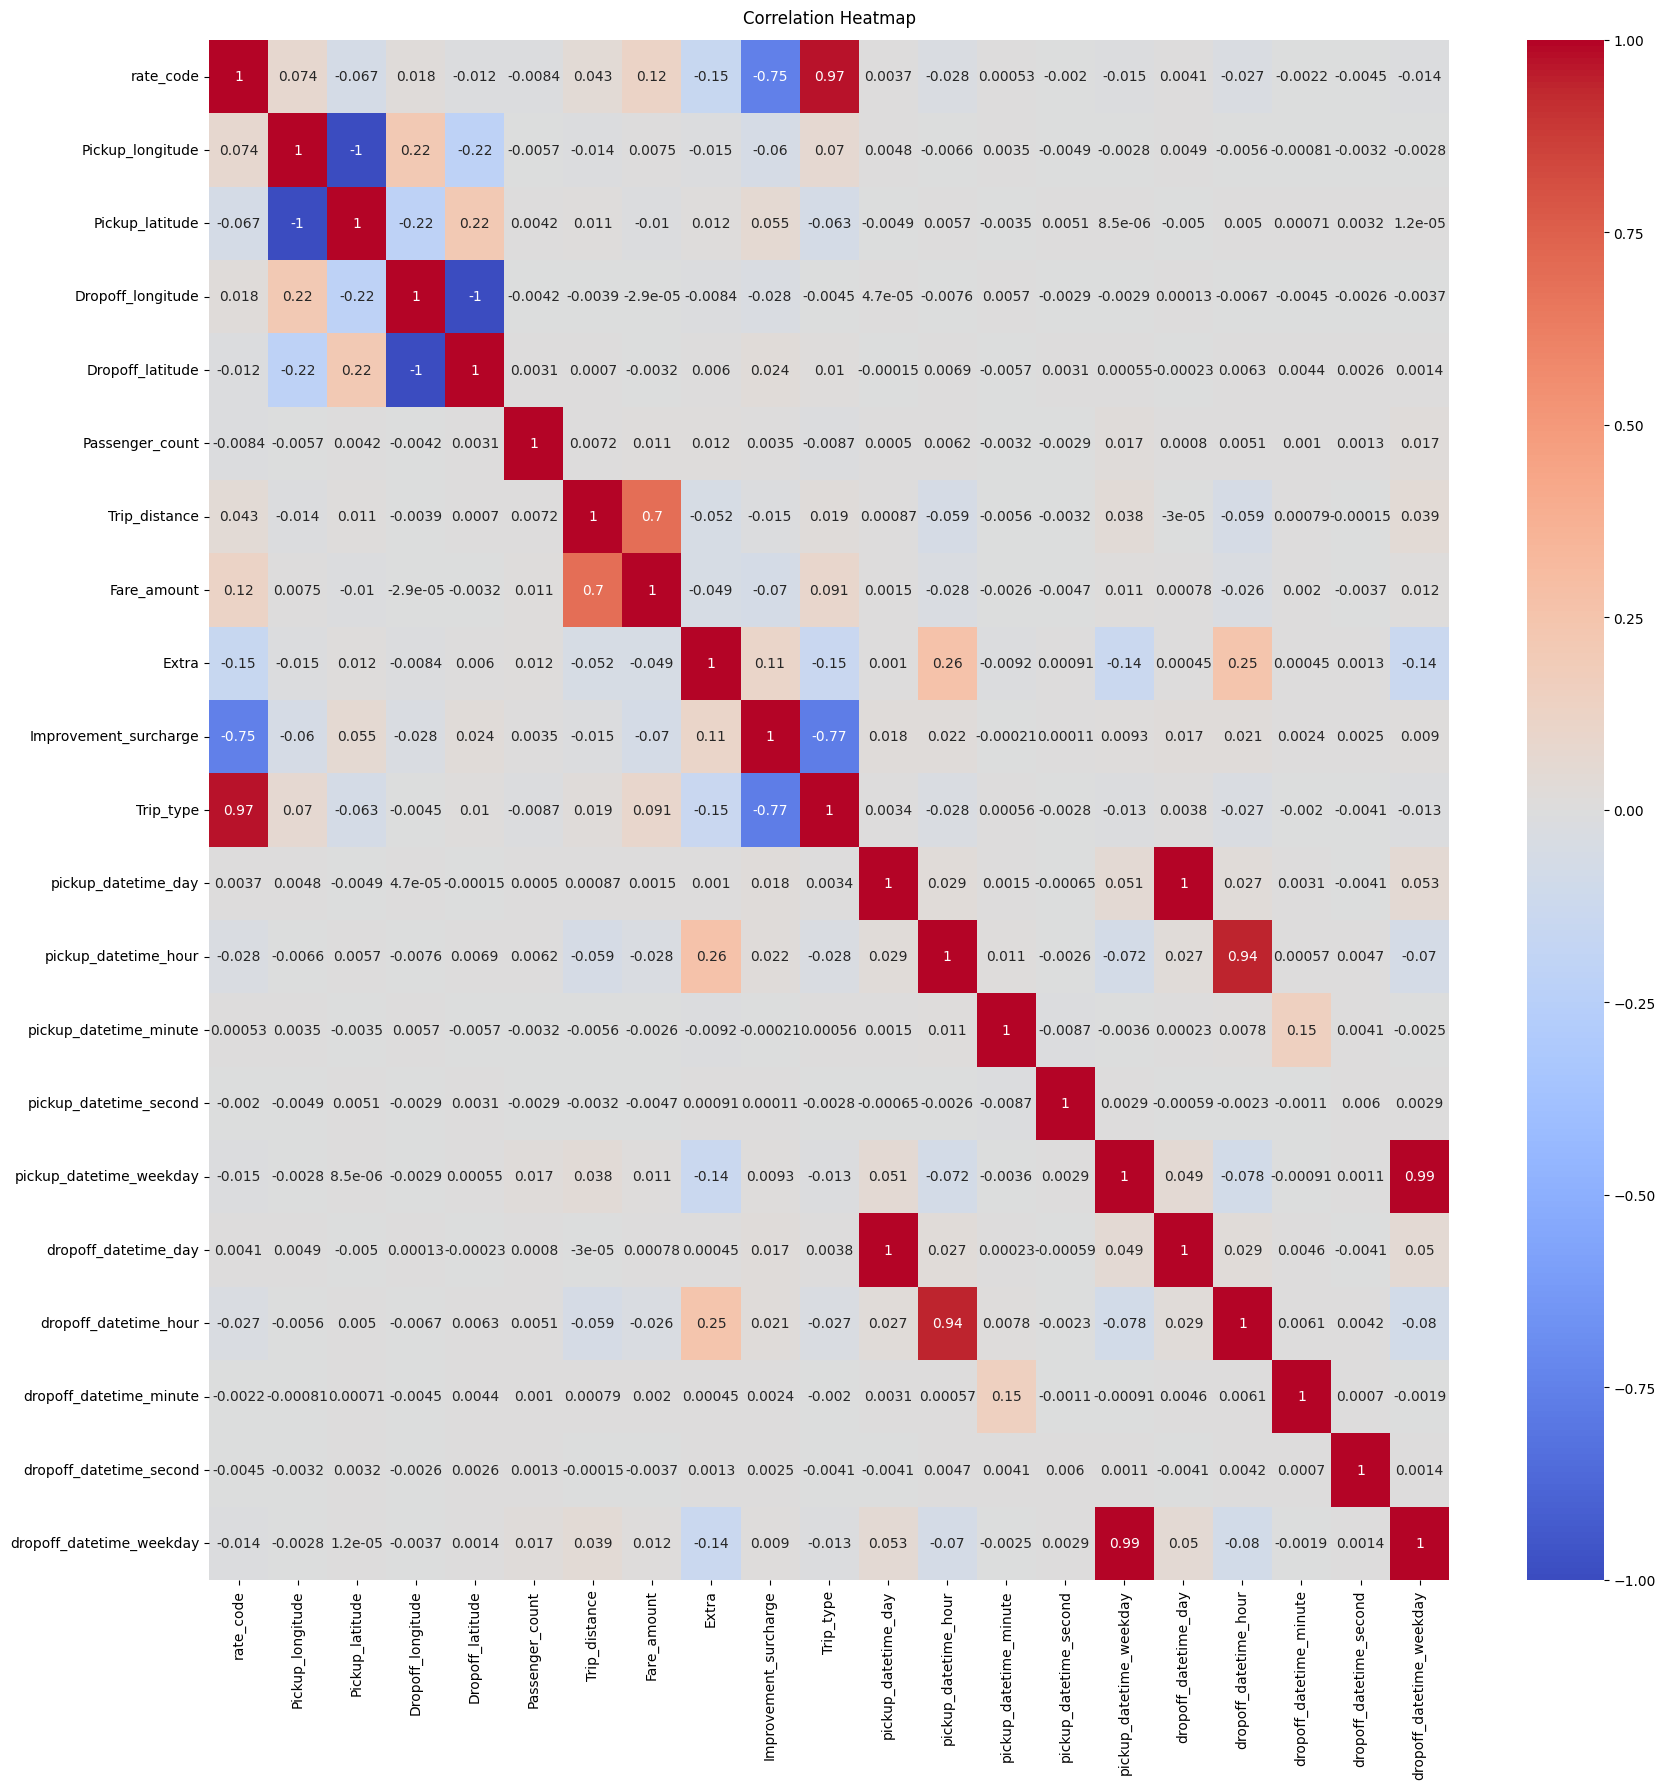

In [12]:
corr=df.corr()
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Fare Amount sabse zyada trip distance par depend kar raha hai

In [13]:
from sklearn.preprocessing import StandardScaler
df2 = df
scaler = StandardScaler()
scaler.fit(df2)

X_scaled = scaler.transform(df2)

# Convert X_scaled to a DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=df2.columns)  # Use original column names if needed

# Now you can use head() on the DataFrame
print(df_scaled.head())

   rate_code  Pickup_longitude  Pickup_latitude  Dropoff_longitude  \
0  -0.162746          0.009894        -0.009242           0.016623   
1  -0.162746         -0.054035        -0.026931          -0.061225   
2  -0.162746         -0.016223         0.029559          -0.029995   
3  -0.162746         -0.040373         0.005604          -0.047018   
4  -0.162746         -0.016846         0.032589          -0.031228   

   Dropoff_latitude  Passenger_count  Trip_distance  Fare_amount     Extra  \
0         -0.027884        -0.355981       1.051514     0.512327 -0.951794   
1         -0.005962         1.533714      -0.542230    -0.343635 -0.951794   
2          0.029879        -0.355981      -0.346332    -0.343635  0.400293   
3          0.013821        -0.355981      -0.758050    -0.529713  0.400293   
4          0.042289         0.588867      -0.326411    -0.083125 -0.951794   

   Improvement_surcharge  ...  pickup_datetime_day  pickup_datetime_hour  \
0               0.201398  ...     

<Axes: xlabel='Features', ylabel='Values'>

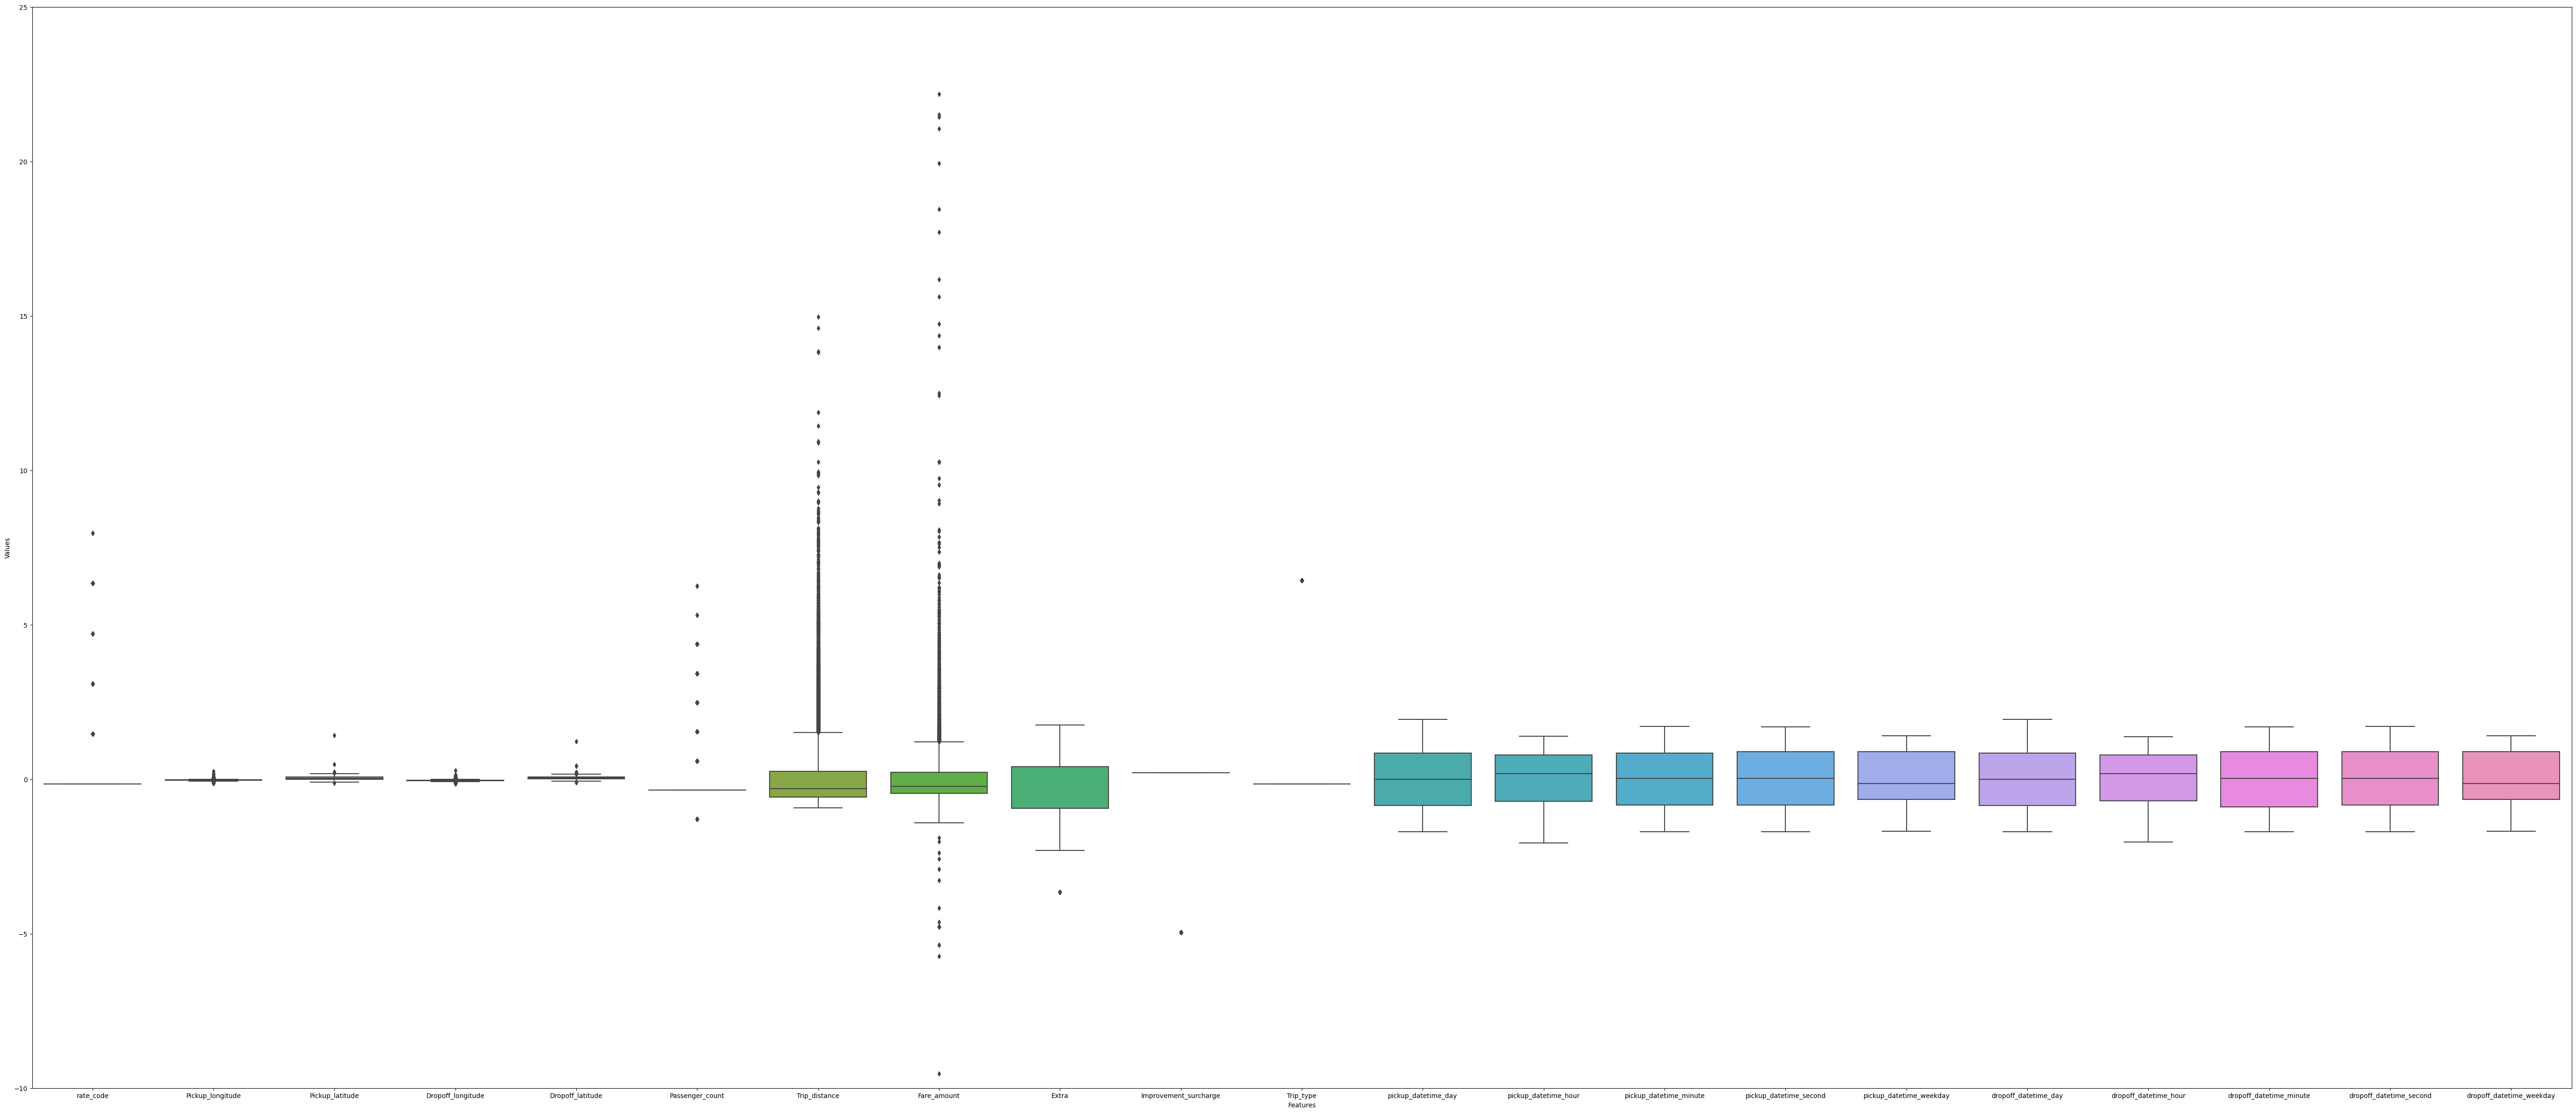

In [14]:
df_melted = df_scaled.melt(var_name='Features', value_name='Values')
plt.figure(figsize=(70, 30))
plt.ylim(-10,25)
sns.boxplot(x='Features', y='Values', data=df_melted)

Text(0, 0.5, 'Fare')

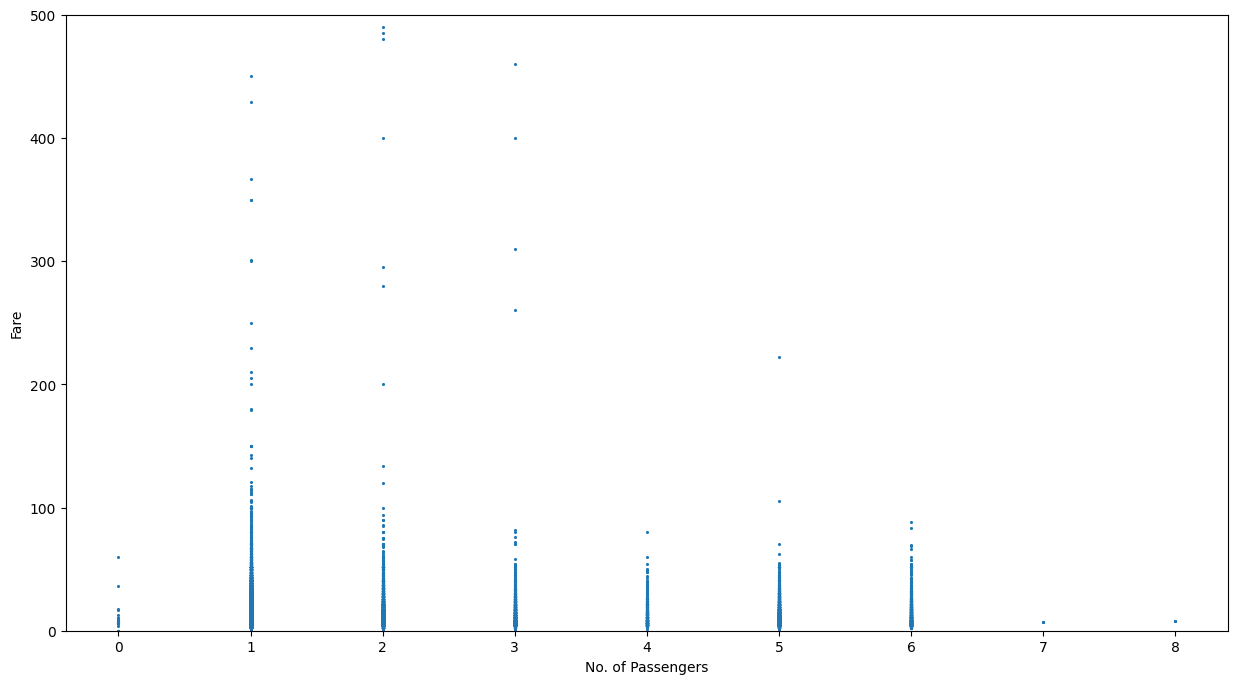

In [15]:
plt.figure(figsize=(15,8))
plt.scatter(x=df['Passenger_count'], y=df['Fare_amount'], s=1.5)
plt.ylim(0,500)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

Single wali taxi mehngyi hai

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

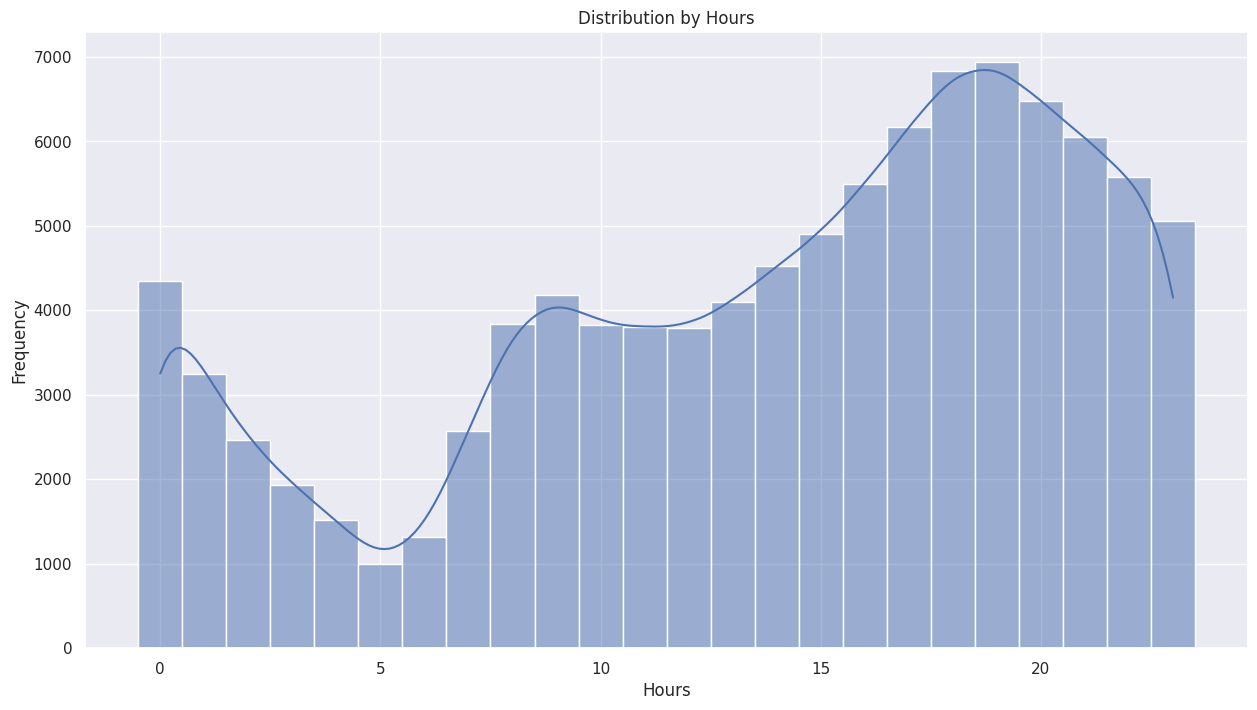

In [16]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data=df, x="pickup_datetime_hour", stat="count", discrete=True, kde=True)
plt.title("Distribution by Hours")
plt.xlabel('Hours')
plt.ylabel('Frequency')

6-8 pm par log zyada taxi lete hai

Text(0, 0.5, 'Fare')

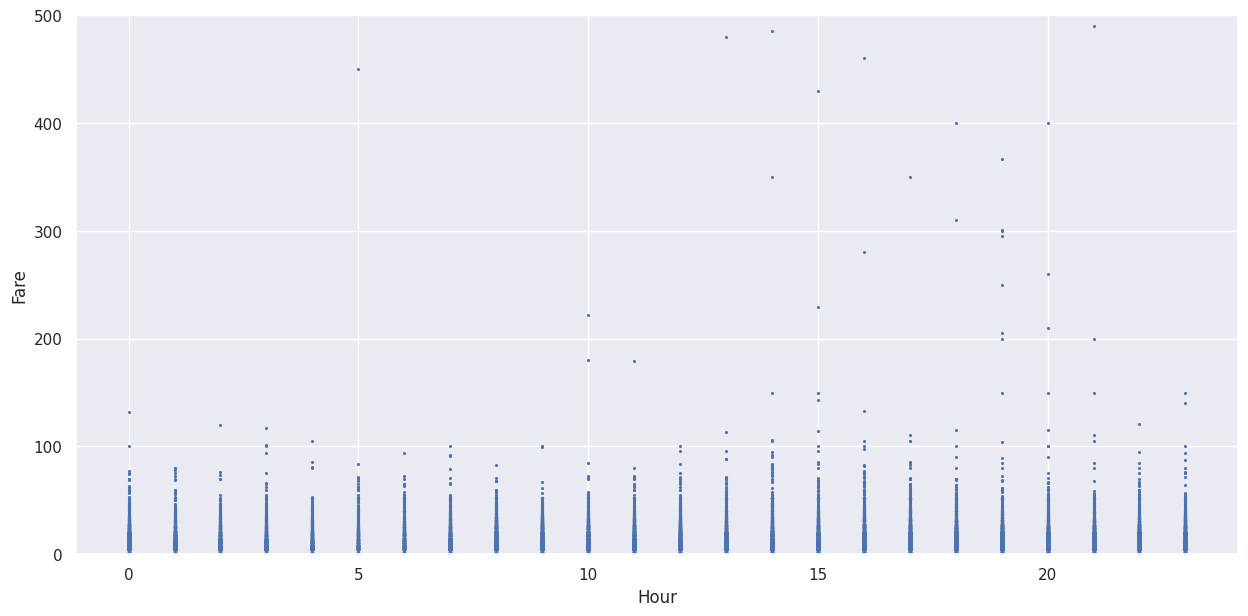

In [17]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['pickup_datetime_hour'], y=df['Fare_amount'], s=1.5)
plt.ylim(0,500)
plt.xlabel('Hour')
plt.ylabel('Fare')

Late night charges zyada hai

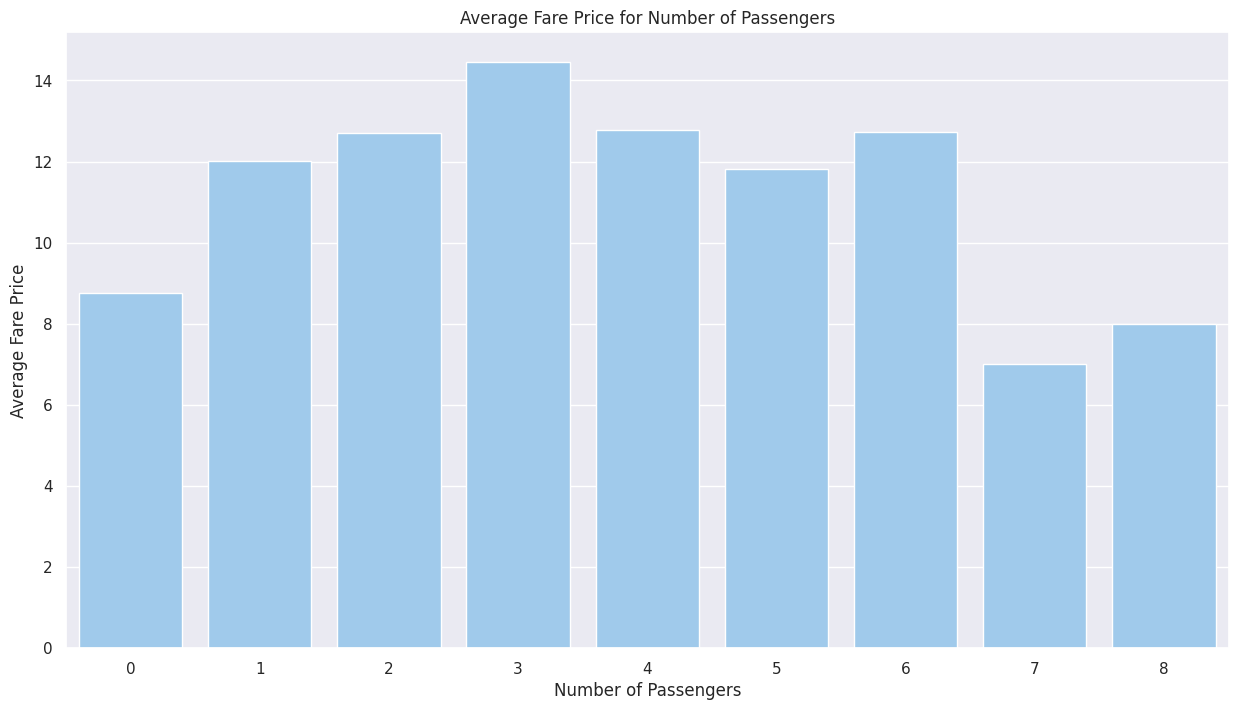

In [18]:
passenger_fare = df.groupby(['Passenger_count']).mean()

# Monocolored bar plot (light blue)
sns.barplot(x=passenger_fare.index, y=passenger_fare['Fare_amount'], palette=['#93cbf8'] * len(passenger_fare))

plt.xlabel('Number of Passengers')
plt.ylabel('Average Fare Price')
plt.title('Average Fare Price for Number of Passengers')
plt.show()


Sabse zyada average price hai 3 passenger wale ka 

# Data Pre-Processing

### We have already removed the unnecessary columns in the EDA Part for our dataset 

## Feature Scaling

Since we already know that distribution of distance  is highly skewed we are going to apply feature scaling that is log transformation to it

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


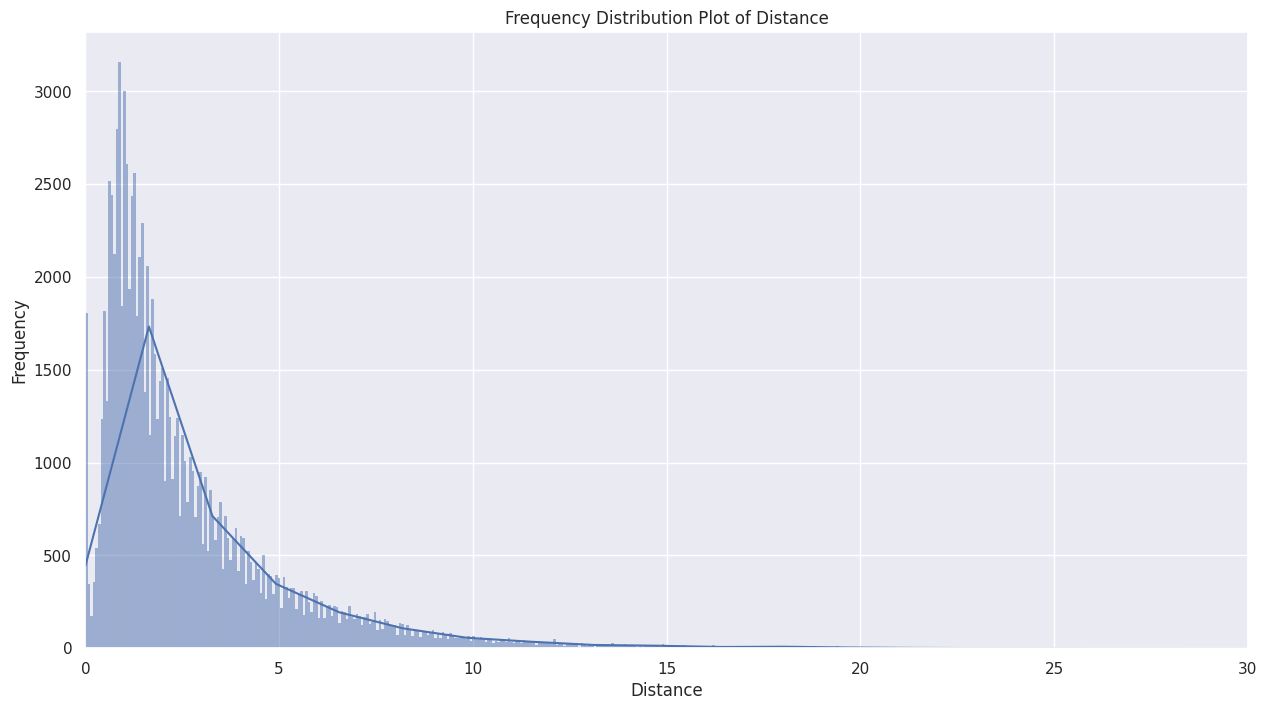

In [19]:
sns.histplot(df['Trip_distance'], bins=5000, kde=True)
plt.title('Frequency Distribution Plot of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')

plt.xlim(0,30)

plt.show()

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,df.columns != "Fare_amount"].copy()
y = df["Fare_amount"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# print(X_train,X_test,y_train,y_train)

In [21]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Models

### Linear Regression

MAE_test: 1.888191285176301, MAE_train:1.9012855842785725, MSE_test : 1.888191285176301,MSE_train : 101.96563891345184,R² Score: 0.5700722997131895


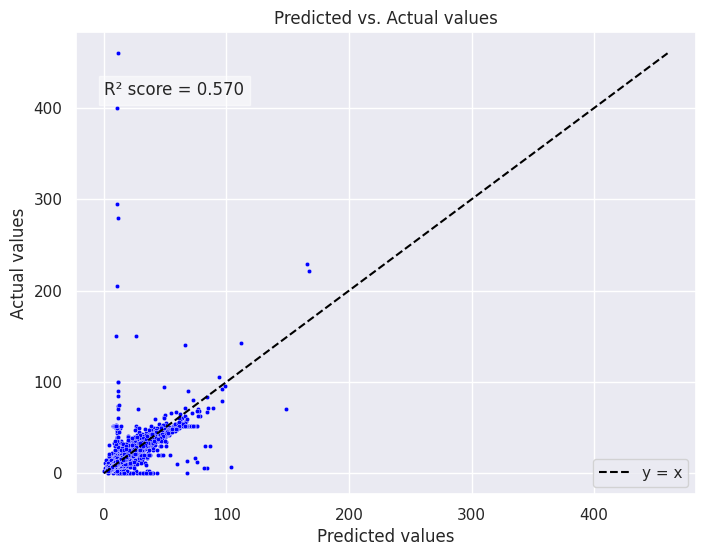

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression




# Use a regression model
model_1 = LinearRegression()
model_1.fit(X_train, y_train)


# Step 6: Make predictions on the test set
y_test_pred = model_1.predict(X_test)
y_train_pred = model_1.predict(X_train)
# Step 7: Evaluate the model
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train=mean_absolute_error(y_train,y_train_pred)
mse_train=mean_squared_error(y_train,y_train_pred)
        
r2 = r2_score(y_test, y_test_pred)

print(f'MAE_test: {mae_test}, MAE_train:{mae_train}, MSE_test : {mae_test},MSE_train : {mse_train},R² Score: {r2}')

plt.figure(figsize=(8, 6))
mask = (y_test >= 0) & (y_test_pred >= 0)
y_true_filtered = y_test[mask]
y_pred_filtered = y_test_pred[mask]
sns.scatterplot(x=y_pred_filtered, y=y_true_filtered, color="blue", s=10)

# Plot a diagonal line representing the perfect prediction (y = x)
plt.plot([min(y_true_filtered), max(y_true_filtered)], [min(y_true_filtered), max(y_true_filtered)], color='black', linestyle='--', label='y = x')

# Add labels and title
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Predicted vs. Actual values')

# Display R² score on the plot
plt.text(0.1, max(y_true_filtered)*0.9, f'R² score = {r2:.3f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Add legend
plt.legend()

# Show plot
plt.show()
del X
del y

Linear Rgression is underfitting

**Plolynomial Regression**

MAE_test: 1.8881912851764093, MAE_train:1.901285584278682, MSE_test : 1.8881912851764093,MSE_train : 101.96563891345184,R² Score: 0.5700722997131891


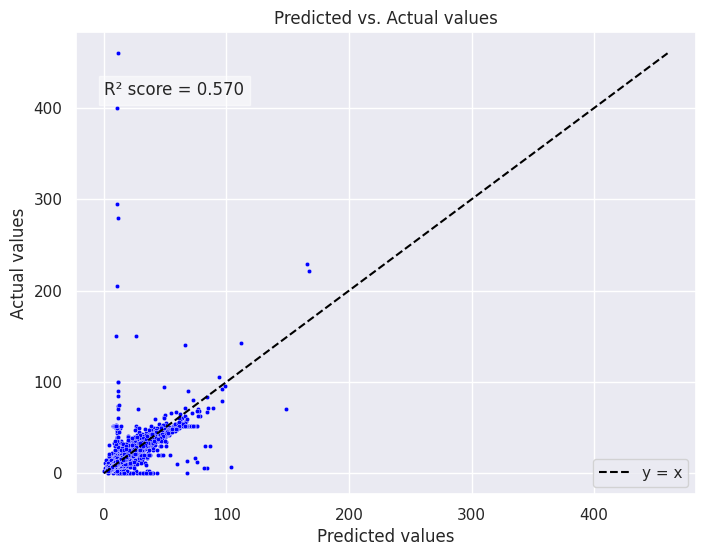

MAE_test: 1.1827570933954574, MAE_train:1.121307781560048, MSE_test : 1.1827570933954574,MSE_train : 85.79733073007391,R² Score: 0.3908323898128856


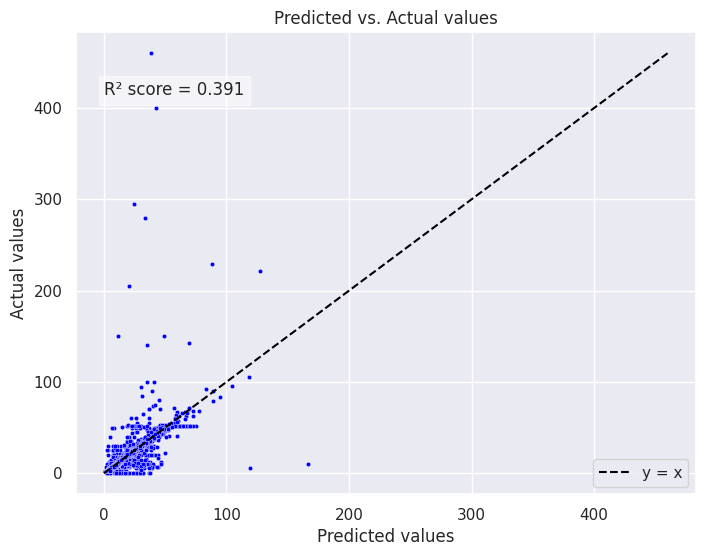

MAE_test: 29806.92527520143, MAE_train:1.094295298553575, MSE_test : 29806.92527520143,MSE_train : 79.51402328937596,R² Score: -129298639985.88657


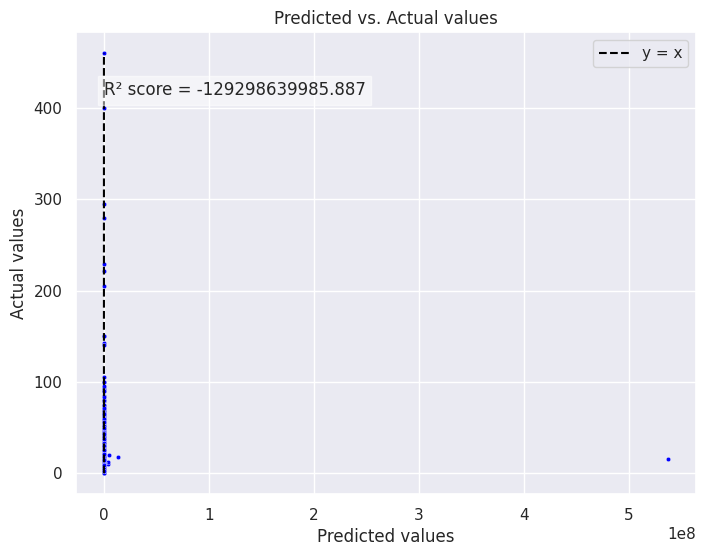

In [23]:
from sklearn.preprocessing import PolynomialFeatures
X = df.iloc[:,df.columns != "Fare_amount"].copy()
y = df["Fare_amount"].copy()

def polynomial_regression_with_rmse(X, y, max_degree, train_size=0.8, random_state=42):
    # Step 1: Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)
    
    # Step 2: Initialize an empty list to store RMSE values for different degrees
    rmse_list = []
    # Step 3: Loop over degrees from 1 to max_degree
    for degree in range(1, max_degree + 1):
        
        # Step 4: Create polynomial features of the given degree
        Poly_transform = PolynomialFeatures(degree=degree)
        X_train_poly = Poly_transform.fit_transform(X_train)
        X_test_poly = Poly_transform.transform(X_test)
        
        # Step 5: Fit a linear regression model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        
        # Step 6: Make predictions on the test set
        y_test_pred = model.predict(X_test_poly)
        y_train_pred = model.predict(X_train_poly)
        # Step 7: Evaluate the model

        mae_test = mean_absolute_error(y_test, y_test_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)

        mae_train=mean_absolute_error(y_train,y_train_pred)
        mse_train=mean_squared_error(y_train,y_train_pred)

        r2 = r2_score(y_test, y_test_pred)

        print(f'MAE_test: {mae_test}, MAE_train:{mae_train}, MSE_test : {mae_test},MSE_train : {mse_train},R² Score: {r2}')
        
        plt.figure(figsize=(8, 6))
        mask = (y_test >= 0) & (y_test_pred >= 0)
        y_true_filtered = y_test[mask]
        y_pred_filtered = y_test_pred[mask]
        sns.scatterplot(x=y_pred_filtered, y=y_true_filtered, color="blue", s=10)

        # Plot a diagonal line representing the perfect prediction (y = x)
        plt.plot([min(y_true_filtered), max(y_true_filtered)], [min(y_true_filtered), max(y_true_filtered)], color='black', linestyle='--', label='y = x')

        # Add labels and title
        plt.xlabel('Predicted values')
        plt.ylabel('Actual values')
        plt.title('Predicted vs. Actual values')

        # Display R² score on the plot
        plt.text(0.1, max(y_true_filtered)*0.9, f'R² score = {r2:.3f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

        # Add legend
        plt.legend()

        # Show plot
        plt.show()

polynomial_regression_with_rmse(X, y, 3, train_size=0.8, random_state=42)
del X
del y

degree 1 and 2 are underfitting
degree 3 is overfitting 

**Decision Tree**

MAE_test: 2.2010059999999996, MAE_train:0.0005625, MSE_test : 508.85189092999997, MSE_train : 0.01265625, R² Score: -3.550950038177149


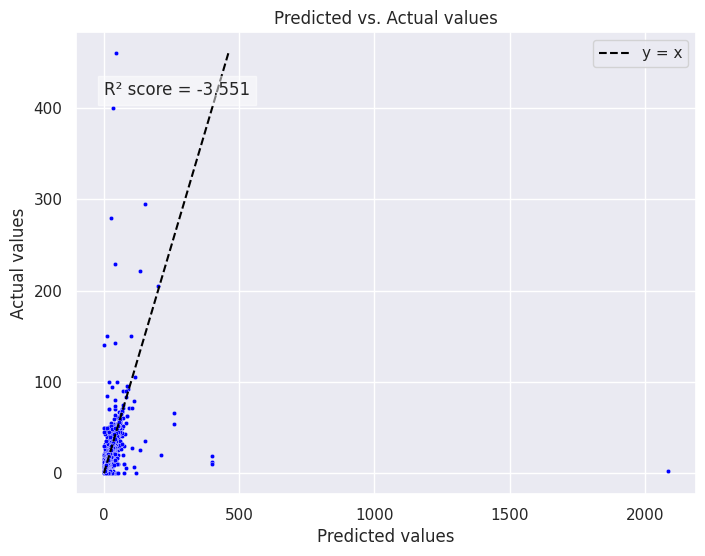

In [24]:
from sklearn.tree import DecisionTreeRegressor

X = df.iloc[:, df.columns != "Fare_amount"].copy()
y = df["Fare_amount"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_test_pred = decision_tree.predict(X_test)
y_train_pred = decision_tree.predict(X_train)

# Step 7: Evaluate the model
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train=mean_absolute_error(y_train,y_train_pred)
mse_train=mean_squared_error(y_train,y_train_pred)
        
r2 = r2_score(y_test, y_test_pred)

print(f'MAE_test: {mae_test}, MAE_train:{mae_train}, MSE_test : {mse_test}, MSE_train : {mse_train}, R² Score: {r2}')

plt.figure(figsize=(8, 6))
mask = (y_test >= 0) & (y_test_pred >= 0)
y_true_filtered = y_test[mask]
y_pred_filtered = y_test_pred[mask]
sns.scatterplot(x=y_pred_filtered, y=y_true_filtered, color="blue", s=10)

# Plot a diagonal line representing the perfect prediction (y = x)
plt.plot([min(y_true_filtered), max(y_true_filtered)], [min(y_true_filtered), max(y_true_filtered)], color='black', linestyle='--', label='y = x')

# Add labels and title
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Predicted vs. Actual values')

# Display R² score on the plot
plt.text(0.1, max(y_true_filtered)*0.9, f'R² score = {r2:.3f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Add legend
plt.legend()

# Show plot
plt.show()

del X
del y

Decision tree is overfitting

**Random Forest**

MAE_test: 1.4596295119999998, MAE_train:0.5576610687500001, MSE_test : 1.4596295119999998,MSE_train : 17.63287100413992,R² Score: 0.5994839798816566


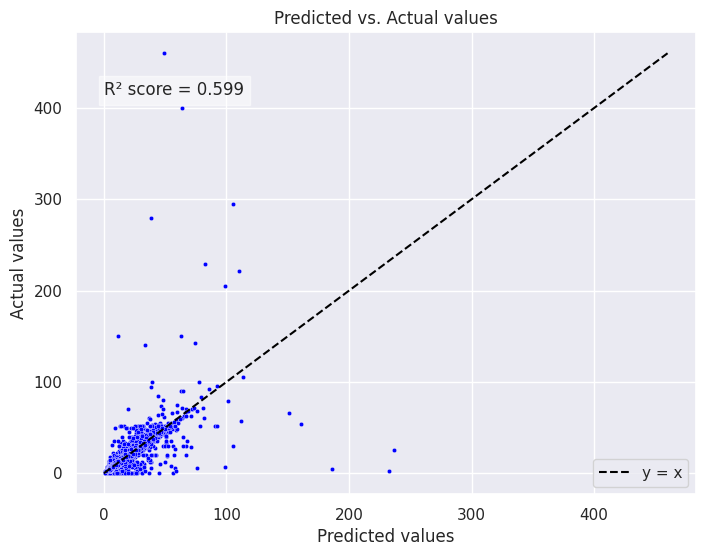

In [25]:
from sklearn.ensemble import RandomForestRegressor


X = df.drop(columns=['Fare_amount']).copy()
y = df['Fare_amount'].copy()

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train_scaled, y_train)
# Step 6: Make predictions on the test set
y_test_pred = rf.predict(X_test_scaled)
y_train_pred = rf.predict(X_train_scaled)
# Step 7: Evaluate the model
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train=mean_absolute_error(y_train,y_train_pred)
mse_train=mean_squared_error(y_train,y_train_pred)
        
r2 = r2_score(y_test, y_test_pred)

print(f'MAE_test: {mae_test}, MAE_train:{mae_train}, MSE_test : {mae_test},MSE_train : {mse_train},R² Score: {r2}')

plt.figure(figsize=(8, 6))
mask = (y_test >= 0) & (y_test_pred >= 0)
y_true_filtered = y_test[mask]
y_pred_filtered = y_test_pred[mask]
sns.scatterplot(x=y_pred_filtered, y=y_true_filtered, color="blue", s=10)

# Plot a diagonal line representing the perfect prediction (y = x)
plt.plot([min(y_true_filtered), max(y_true_filtered)], [min(y_true_filtered), max(y_true_filtered)], color='black', linestyle='--', label='y = x')

# Add labels and title
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Predicted vs. Actual values')

# Display R² score on the plot
plt.text(0.1, max(y_true_filtered)*0.9, f'R² score = {r2:.3f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Add legend
plt.legend()

# Show plot
plt.show()

del X
del y

ye wala thoda theek hai

**XGboost**

MAE_test: 0.933100672473915, MAE_train:0.2243370327135901, MSE_test : 0.933100672473915,MSE_train : 0.11844155985155726,R² Score: 0.6822311222432016


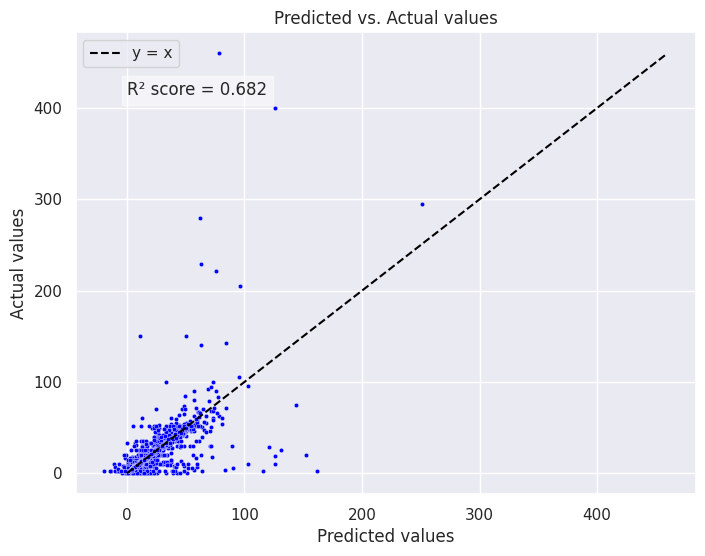

In [26]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a DMatrix for XGBoost (optional, but recommended for efficiency)
X = df.drop(columns=['Fare_amount']).copy()
y = df['Fare_amount'].copy()

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',  # For regression tasks
    learning_rate=0.07,             # Step size shrinkage
    n_estimators=4000,             # Number of boosting rounds
    eval_metric='rmse'             # Root Mean Squared Error as evaluation metric
)

# Train the model
xg_reg.fit(X_train, y_train)

# Predict
preds = xg_reg.predict(X_test)
pred2 = xg_reg.predict(X_train)
# Calculate evaluation metrics
mae_test = mean_absolute_error(y_test, preds)
mse_test = mean_squared_error(y_test, preds)

mae_train=mean_absolute_error(y_train,pred2)
mse_train=mean_squared_error(y_train,pred2)
        
r2 = r2_score(y_test, preds)

# Print the results
print(f'MAE_test: {mae_test}, MAE_train:{mae_train}, MSE_test : {mae_test},MSE_train : {mse_train},R² Score: {r2}')


plt.figure(figsize=(8, 6))
mask = (y_test >= 0) & (y_test_pred >= 0)
y_true_filtered = y_test[mask]
y_pred_filtered = preds[mask]
sns.scatterplot(x=y_pred_filtered, y=y_true_filtered, color="blue", s=10)

# Plot a diagonal line representing the perfect prediction (y = x)
plt.plot([min(y_true_filtered), max(y_true_filtered)], [min(y_true_filtered), max(y_true_filtered)], color='black', linestyle='--', label='y = x')

# Add labels and title
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Predicted vs. Actual values')

# Display R² score on the plot
plt.text(0.1, max(y_true_filtered)*0.9, f'R² score = {r2:.3f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Add legend
plt.legend()

# Show plot
plt.show()

del X
del y

ye overfit kar rha hai

**Multi Layer Perceptron**

MAE_test: 1.8757784975518499, MAE_train:1.8573070985269464, MSE_test : 1.8757784975518499,MSE_train : 88.81149976283398,R² Score: 0.6323562944684178


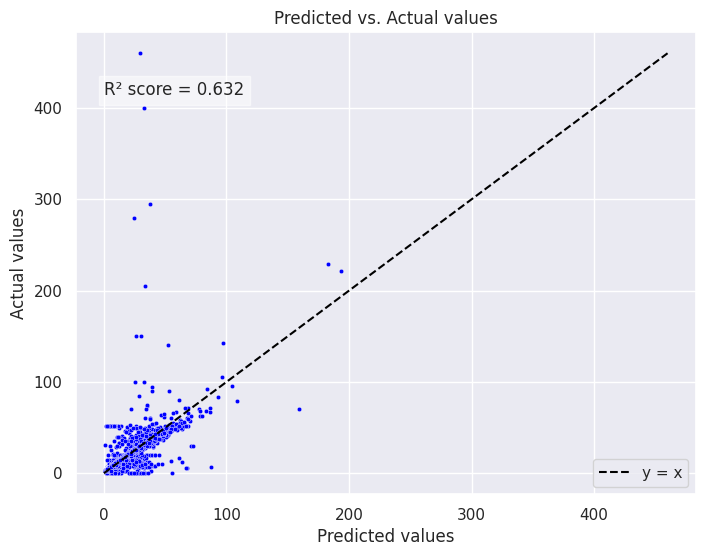

In [27]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np


X = df.drop(columns=['Fare_amount']).copy()
y = df['Fare_amount'].copy()

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the MLP model
mlp = MLPRegressor(
    hidden_layer_sizes=( 64, 32, 16),  # 4 hidden layers
    activation='relu',                        # ReLU activation
    solver='adam',                            # Adam optimizer
    max_iter=100,                            # Increased max iterations for convergence
    random_state=42
)

# Train the model
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)
y_pred2 = mlp.predict(X_train)
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

mae_train=mean_absolute_error(y_train,y_pred2)
mse_train=mean_squared_error(y_train,y_pred2)
        
r2 = r2_score(y_test, y_pred)
print(f'MAE_test: {mae_test}, MAE_train:{mae_train}, MSE_test : {mae_test},MSE_train : {mse_train},R² Score: {r2}')


plt.figure(figsize=(8, 6))
mask = (y_test >= 0) & (y_pred >= 0)
y_true_filtered = y_test[mask]
y_pred_filtered = y_pred[mask]
sns.scatterplot(x=y_pred_filtered, y=y_true_filtered, color="blue", s=10)

# Plot a diagonal line representing the perfect prediction (y = x)
plt.plot([min(y_true_filtered), max(y_true_filtered)], [min(y_true_filtered), max(y_true_filtered)], color='black', linestyle='--', label='y = x')

# Add labels and title
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Predicted vs. Actual values')

# Display R² score on the plot
plt.text(0.1, max(y_true_filtered)*0.9, f'R² score = {r2:.3f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Add legend
plt.legend()

# Show plot
plt.show()

del X
del y

ye underfitting jaisa kuch hai

MAE_test: 1.1299576904790125, MAE_train:1.1158420954636972, MSE_test : 1.1299576904790125,MSE_train : 87.59884409069191,R² Score: 0.6420865338436601


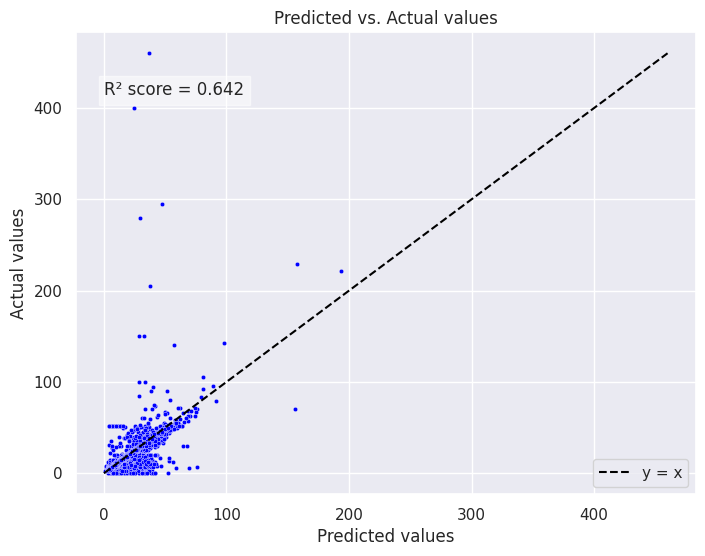

In [28]:
X = df.drop(columns=['Fare_amount']).copy()
y = df['Fare_amount'].copy()

# # Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),
    activation='relu',
    solver='adam',
    alpha=0.001,                 
    learning_rate_init=0.001,    
    max_iter=1000,
    random_state=42
)
mlp.fit(X_train, y_train)


# Step 6: Make predictions on the test set
y_test_pred = mlp.predict(X_test)
y_train_pred = mlp.predict(X_train)
# Step 7: Evaluate the model

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train=mean_absolute_error(y_train,y_train_pred)
mse_train=mean_squared_error(y_train,y_train_pred)
        
r2 = r2_score(y_test, y_test_pred)

print(f'MAE_test: {mae_test}, MAE_train:{mae_train}, MSE_test : {mae_test},MSE_train : {mse_train},R² Score: {r2}')

plt.figure(figsize=(8, 6))
mask = (y_test >= 0) & (y_test_pred >= 0)
y_true_filtered = y_test[mask]
y_pred_filtered = y_test_pred[mask]
sns.scatterplot(x=y_pred_filtered, y=y_true_filtered, color="blue", s=10)

# Plot a diagonal line representing the perfect prediction (y = x)
plt.plot([min(y_true_filtered), max(y_true_filtered)], [min(y_true_filtered), max(y_true_filtered)], color='black', linestyle='--', label='y = x')

# Add labels and title
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Predicted vs. Actual values')

# Display R² score on the plot
plt.text(0.1, max(y_true_filtered)*0.9, f'R² score = {r2:.3f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Add legend
plt.legend()

# Show plot
plt.show()

del X
del y

MSE_Train : 87.59884409069191, MSE_Test : 48.071705626874916 , R2_score : 0.570067568859713


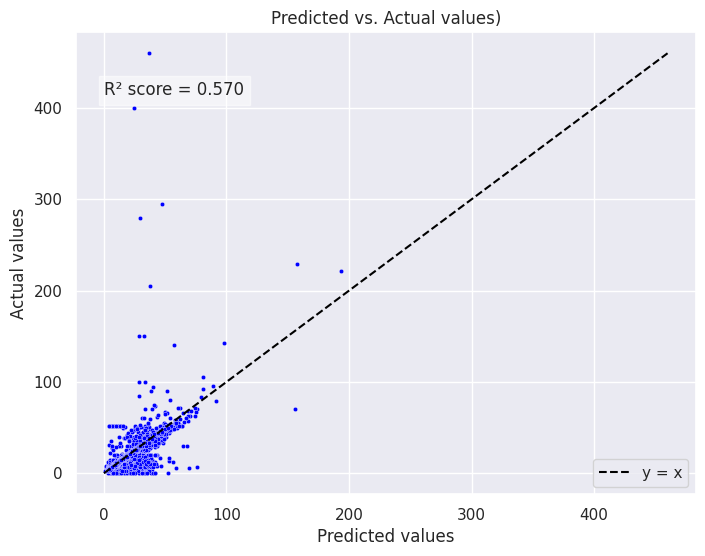

In [29]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=['Fare_amount']).copy()
y = df['Fare_amount'].copy()

# # Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ridge_model = Ridge(alpha=1.0)  # You can adjust alpha for regularization strength
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mse_tr = mean_squared_error(y_train,y_train_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE_Train : {mse_tr}, MSE_Test : {mse} , R2_score : {r2}")

plt.figure(figsize=(8, 6))
mask = (y_test >= 0) & (y_test_pred >= 0)
y_true_filtered = y_test[mask]
y_pred_filtered = y_test_pred[mask]
sns.scatterplot(x=y_pred_filtered, y=y_true_filtered, color="blue", s=10)

# Plot a diagonal line representing the perfect prediction (y = x)
plt.plot([min(y_true_filtered), max(y_true_filtered)], [min(y_true_filtered), max(y_true_filtered)], color='black', linestyle='--', label='y = x')

# Add labels and title
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Predicted vs. Actual values)')

# Display R² score on the plot
plt.text(0.1, max(y_true_filtered)*0.9, f'R² score = {r2:.3f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Add legend
plt.legend()

# Show plot
plt.show()

del X
del y